## 1. Importing Libraries

In [108]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import pickle

## 2. Read the dataset

In [2]:
df = pd.read_csv('diabetes.csv')

## 3. Display the 5 first rows


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

## 4. Information about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## 5.Describe the dataset to know more about the it

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## 6. Check the number of missing values our dataset has

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 7. Plotting the data distribution plots

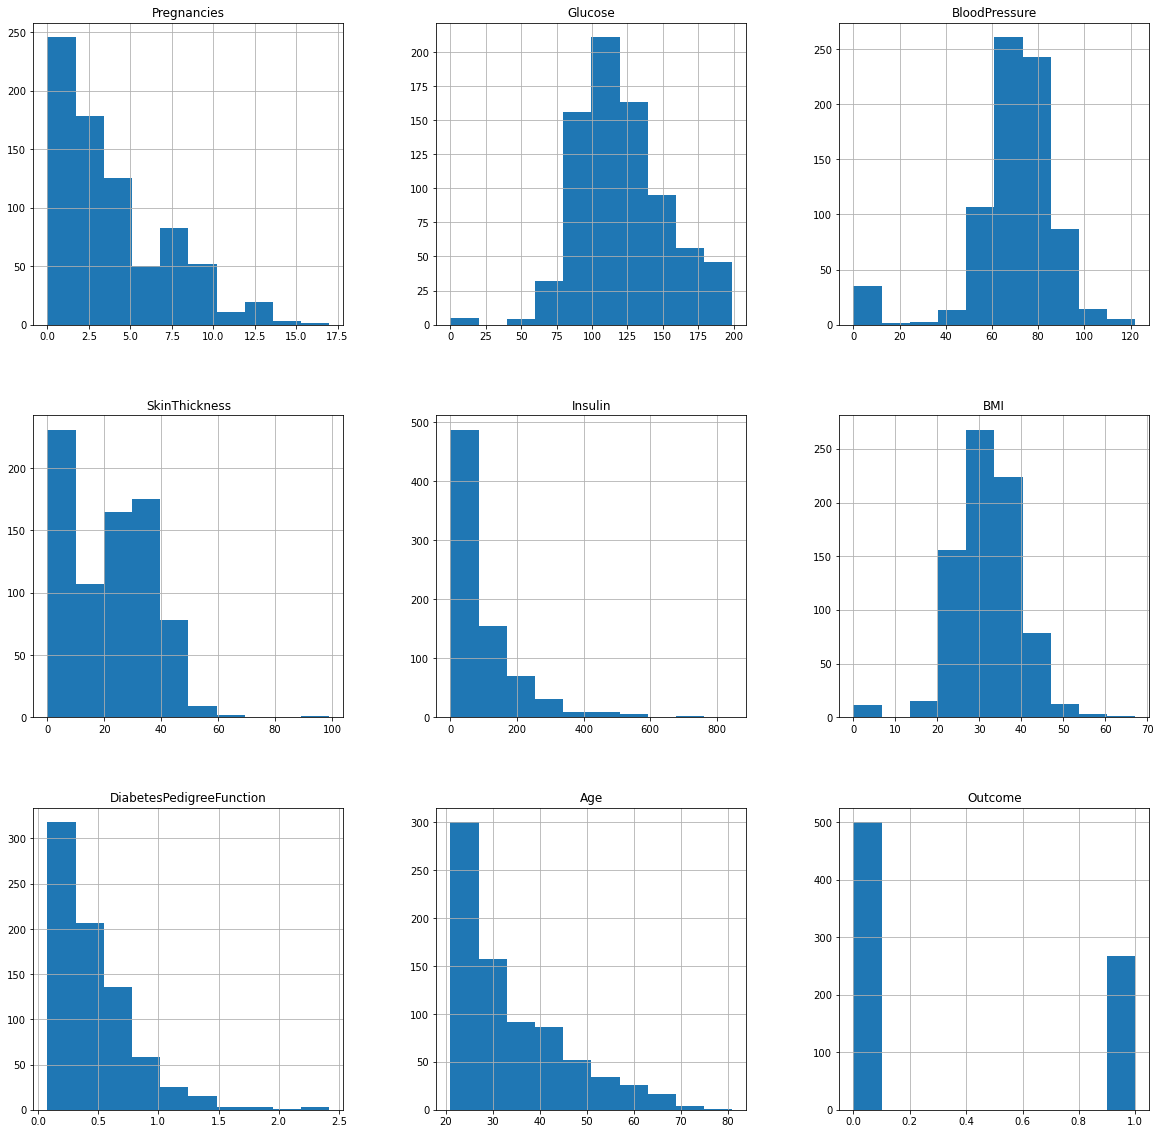

In [8]:
p = df.hist(figsize = (20,20))

Text(0.5, 0, 'Sample')

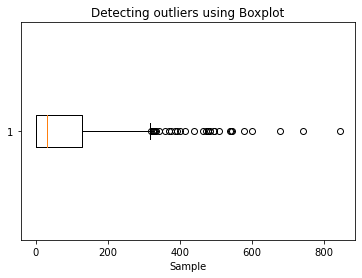

In [9]:
plt.boxplot(df["Insulin"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')

In [10]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(df["Insulin"])
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [543, 846, 495, 485, 495, 478, 744, 680, 545, 465, 579, 474, 480, 600, 440, 540, 480, 510]


In [11]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(df["DiabetesPedigreeFunction"])
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [2.288, 1.893, 1.781, 2.329, 1.476, 2.137, 1.731, 1.6, 2.42, 1.699, 1.698]


In [12]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(df["Pregnancies"])
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [15, 17, 14, 14]


In [13]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(df["Age"])
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [69, 72, 81, 70, 69]


In [14]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(df["Glucose"])
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [0, 0, 0, 0, 0]


In [15]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(df["SkinThickness"])
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [99]


In [16]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(df["BMI"])
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [0.0, 0.0, 0.0, 0.0, 0.0, 67.1, 0.0, 0.0, 59.4, 0.0, 0.0, 57.3, 0.0, 0.0]


In [17]:
# Replace the 0 values with the NAN
df[
    ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
]  = 
df[
    ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

SyntaxError: invalid syntax (<ipython-input-17-504e18c94fb8>, line 4)

In [18]:
# check the number of missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
# Replace the missing values
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)

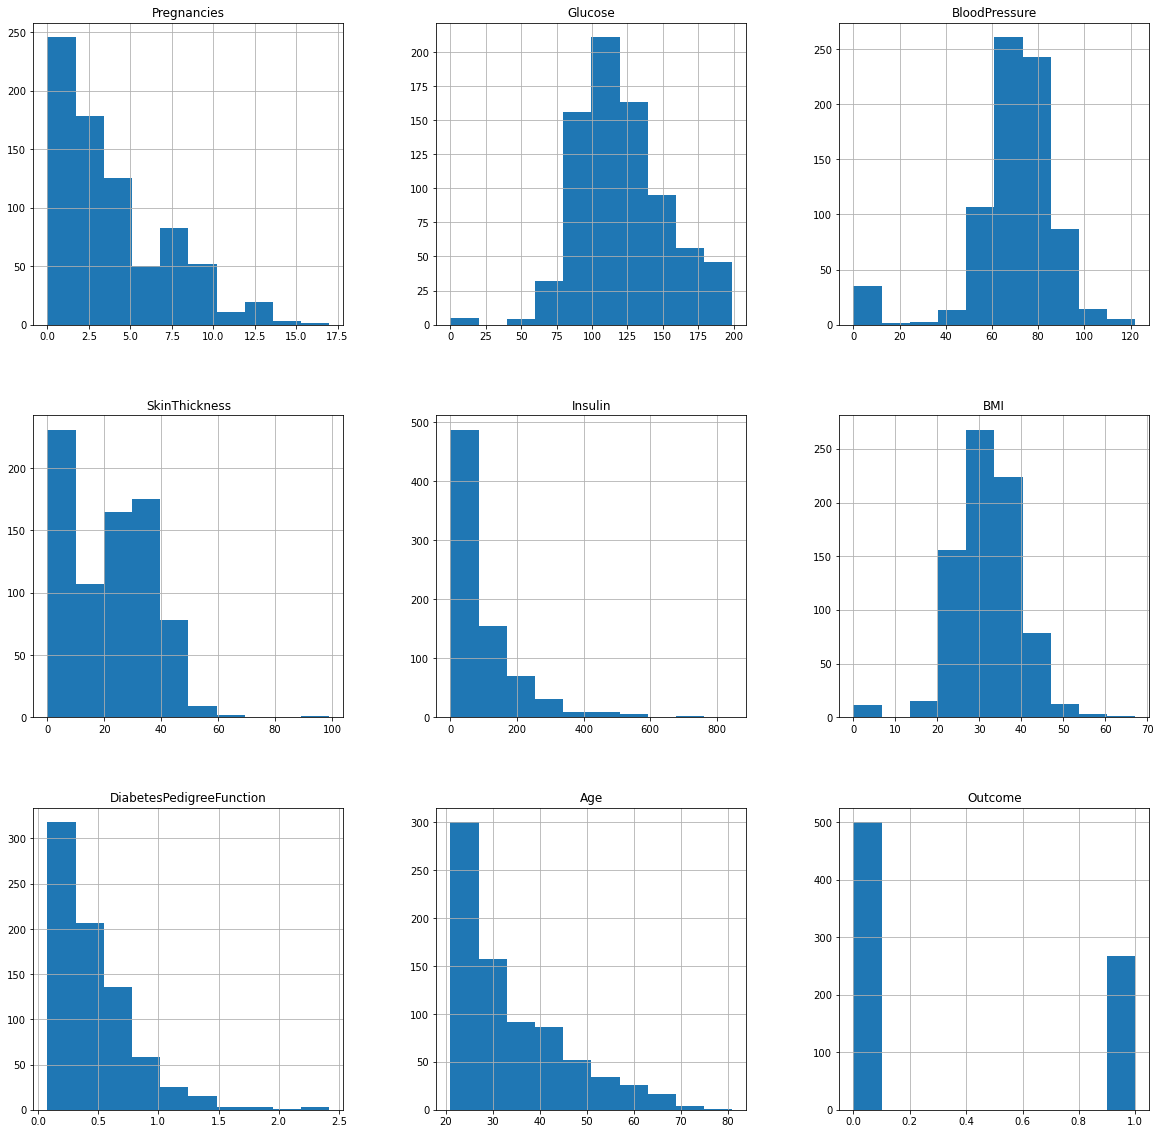

In [20]:
p = df.hist(figsize = (20,20))

## check that how well our outcome column is balanced

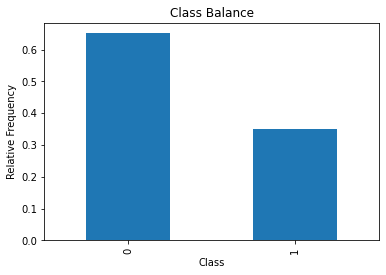

In [21]:
# Plot value counts of `"Outcome"`
df["Outcome"].value_counts(normalize=True).plot(
    kind="bar", xlabel="Class", ylabel="Relative Frequency", title="Class Balance"
);

## Correlation between all the features

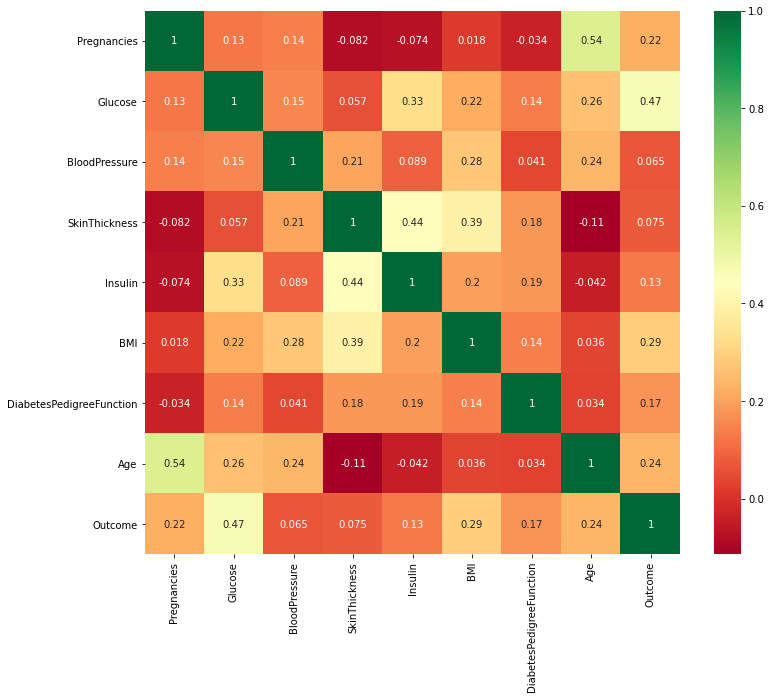

In [22]:
plt.figure(figsize=(12,10))
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

In [26]:
# Create your feature matrix X and target vector y
target = "Outcome"
X = df.drop(columns=target)
y = df[target]

In [27]:
# Features Scaling
sc = StandardScaler()
X = sc.fit_transform(X)
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [28]:
# Divide the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 8)
y_train shape: (614,)
X_test shape: (154, 8)
y_test shape: (154,)


## Building the model using RandomForest

In [98]:
# Instanciate the model
RFClassifier = RandomForestClassifier(n_estimators=600)

In [99]:
# Fit the model
RFClassifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

In [100]:
# Prediction and accuracy
predictions = RFClassifier.predict(X_test)
print("Accuracy_Score =", format(accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7402597402597403


In [103]:
# Display the confusion matrix
cm = confusion_matrix(predictions, y_test)
cm

array([[78, 19],
       [21, 36]], dtype=int64)

## Building the model using DecisionTree

In [89]:
# Instanciate the model
DTClassifier = DecisionTreeClassifier()


In [90]:
# Fit the model
DTClassifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [106]:
# Prediction and accuracy
predictions2 = DTClassifier.predict(X_test)
print("Accuracy Score =", format(accuracy_score(y_test,predictions2)))

Accuracy Score = 0.7662337662337663


In [107]:
# Display the confusion matrix
cm = confusion_matrix(predictions2, y_test)
cm

array([[79, 16],
       [20, 39]], dtype=int64)

## Building the model with SVM

In [92]:
# Instanciate the model
svClassifier = SVC()


In [93]:
# Fit the model
svClassifier.fit(X_train, y_train)


SVC()

In [94]:
# Prediction and accuracy
svc_pred = svc_model.predict(X_test)
print("Accuracy Score =", format(accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.7272727272727273


In [105]:
# Display the confusion matrix
cm = confusion_matrix(svc_pred, y_test)
cm

array([[81, 24],
       [18, 31]], dtype=int64)

In [83]:
DTClassifier.feature_importances_

array([0.04885521, 0.31590208, 0.15113023, 0.0606083 , 0.06355162,
       0.15468574, 0.1017383 , 0.10352852])

In [67]:
df.columns[:8]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

<AxesSubplot:>

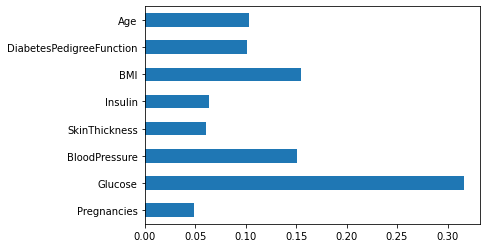

In [84]:
(pd.Series(DTClassifier.feature_importances_, index=df.columns[:8]).plot(kind='barh'))

In [111]:
filename = 'finalized_model.pkl'
pickle.dump(DTClassifier, open(filename, 'wb'))